$\Large\textbf{Lab 5.} \large\textbf{Exercise 2.}$



Code for answer 1)

In [1]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x, n):  
    #Input: x is a numpy array of size n 
    assert type(x) is np.ndarray 
    assert len(x) == n 
    f = 0

    for i in range(n-1):
        f += ((x[i]-1)**2 + (x[0]-x[i]**2)**2)
        
    return (f)

In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x, n):  
    #Input: x is a numpy array of size n
    assert type(x) is np.ndarray  
    assert len(x) == n 

    gradient = [2*(x[0]-1) + 2*(x[0] - x[0]**2)*(1-2*x[0])]
    gradient[0] += sum(2*(x[0]-x[i]**2) for i in range(1,n))

    for i in range(1,n):
        gradient[i] = (2*(x[i]-1) + 2*(x[0]-x[i]**2)*(-2*x[i]))
        
    return gradient

In [4]:
def evalh(x,n):
    assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
    assert len(x) == n #do not allow arbitrary size arguments

    hessian = np.zeros((n,n))
    hessian[0][0] = 4 - 4*x[0] - 8*x[0] + 12*x[0]**2
    
    for i in range(1,n):
      hessian[0][0] += 2
      hessian[0][i] = -4*x[i]
      hessian[i][0] = -4*x[i]
      hessian[i][i] = 2 - 4*x[0] + 12*x[i]**2

    return hessian

In [ ]:
def compute_steplength_backtracking(x, n, gradf, D_k, alpha_start, rho, gamma): #add appropriate arguments to the function 
    assert type(x) is np.ndarray and len(gradf) == n
    assert type(gradf) is np.ndarray and len(gradf) == n 
    assert type(alpha_start) is float and alpha_start>=0. 
    assert type(rho) is float and rho>=0.
    assert type(gamma) is float and gamma>=0. 
    assert type(D_k) is np.ndarray and len(D_k) == n
    
    alpha = alpha_start
    pk = -gradf
    while evalf(np.add(x, alpha*np.dot(D_k,pk)), n) > np.subtract(evalf(x, n), gamma*alpha*np.dot(np.dot(D_k,gradf), gradf)):
    
        alpha = rho*alpha
    
    return alpha

In [ ]:
# Method to construct D_k matrix used in Newton's method
def compute_D_k_newton(x, n):
    assert type(x) is np.ndarray
    assert len(x) == n
    
    return np.linalg.inv(evalh(x, n))

In [ ]:
#line search type 
CONSTANT_STEP_LENGTH = 1
BACKTRACKING_LINE_SEARCH = 2

Code for answer 2)

In [ ]:
def find_minimizer_BFGS(start_x, n, tol, line_search_type, *args):
    assert type(start_x) is np.ndarray  
    assert len(start_x) == n  
    assert type(tol) is float and tol>=0 

    x = start_x
    g_x = evalg(x,n)
    h_x = evalh(x,n)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any arguments'
            raise ValueError(err_msg)
        elif len(args)<3 :
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three arguments'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0
    B = np.identity(n)

    while (np.linalg.norm(g_x) > tol): 
        d_k = B
        p = -np.dot(B, g_x)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking(x, n, g_x, d_k, alpha_start, rho, gamma) 
        elif line_search_type == CONSTANT_STEP_LENGTH: 
            step_length = 1.0
        else:  
            raise ValueError('Line search type unknown')
        
        # Gradient descent steps
        x_next = np.add(x, np.multiply(step_length,p)) 
        s_k = x_next - x
        y_k = evalg(x_next,n) - g_x
        mu_k = 1.0/np.dot(y_k.T, s_k)
        temp = (np.identity(n) - np.multiply(mu_k,np.outer(y_k, s_k.T)))
        B = np.dot(temp.T, np.dot(B, temp)) + np.multiply(mu_k, np.outer(s_k, s_k.T))
        k += 1 
        x = x_next
        g_x = evalg(x,n)
        # print('iter:',k, ' x:', x, ' f(x):', evalf(x,n), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))


    return x, k, evalf(x,n)

Code for answer 4)

In [ ]:
def find_minimizer_Newtonmethod(start_x, n, tol, line_search_type, *args):
    #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
    assert type(start_x) is np.ndarray 
    assert len(start_x) == n 
    assert type(tol) is float and tol>=0 

    x = start_x
    g_x = evalg(x,n)
    h_x = evalh(x,n)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any arguments'
            raise ValueError(err_msg)
        elif len(args)<3 :
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three arguments'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0

    while (np.linalg.norm(g_x) > tol):
        d_k = compute_D_k_newton(x, n)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking(x, n, g_x, d_k, alpha_start, rho, gamma) 
        elif line_search_type == CONSTANT_STEP_LENGTH: 
            step_length = 1.0
        else:  
            raise ValueError('Line search type unknown')
        
        # Gradient descent steps
        x = np.subtract(x, np.multiply(step_length,np.dot(d_k, g_x))) 
        k += 1 
        g_x = evalg(x,n) 

    return x, k, evalf(x,n)

In [ ]:
n = [1000, 2500, 5000, 7500, 10000]
my_tol= 1e-3
alpha_start = 0.9
rho = 0.5
gamma = 0.5

Code for answer 3)

In [ ]:
minimizer_bfgs = [0 for i in range(5)]
iters_bfgs  = [0 for i in range(5)]
min_fval_bfgs = [0 for i in range(5)]
time_taken_bfgs = [0 for i in range(5)]


for i in range(5):
    my_start_x = np.zeros(n[i])  
    start_time = timer()
    minimizer_bfgs[i] , iters_bfgs[i] , min_fval_bfgs[i] = find_minimizer_BFGS(my_start_x, n[i], my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
    end_time = timer()
    time_taken_bfgs[i] = end_time - start_time
    print("n:", n[i])
    print("Minimum function value:", min_fval_bfgs[i])
    print("No of iterations:", iters_bfgs[i])
    print("Time taken:", time_taken_bfgs[i])
    print("Minimizer:", minimizer_bfgs[i])
    print("\n***************************************************************************************************************************************")

n: 1000
Minimum function value: 2.318840392205928e-10
No of iterations: 10
Time taken: 4.204057289000005
Minimizer: [0.99999899 0.99999972 0.99999972 0.99999972 0.99999972 0.99999972
 0.99999972 0.99999972 0.99999971 0.99999972 0.99999972 0.99999971
 0.99999971 0.99999971 0.99999971 0.99999971 0.99999971 0.99999971
 0.99999971 0.99999971 0.99999971 0.99999971 0.99999971 0.99999971
 0.99999971 0.99999971 0.99999971 0.99999971 0.99999971 0.99999971
 0.99999971 0.99999971 0.99999971 0.99999971 0.99999971 0.99999971
 0.99999971 0.99999971 0.99999971 0.99999971 0.9999997  0.99999971
 0.99999971 0.9999997  0.9999997  0.9999997  0.99999971 0.9999997
 0.9999997  0.9999997  0.9999997  0.9999997  0.9999997  0.9999997
 0.9999997  0.9999997  0.9999997  0.9999997  0.9999997  0.9999997
 0.9999997  0.9999997  0.9999997  0.9999997  0.9999997  0.9999997
 0.9999997  0.9999997  0.9999997  0.9999997  0.9999997  0.9999997
 0.9999997  0.9999997  0.9999997  0.9999997  0.99999969 0.9999997
 0.9999997  0.99999

In [ ]:
time_taken_bfgs=[4.204057289000005, 48.858498209000004, 196.80714036700002, 639.290865549, 1604.266263476]

Note: Storing time taken by BFGS method (in seconds) in a list so that the values dont get lost.

In [ ]:
print("Time taken by BFGS Method for each n")
print("n \t Time taken")
for i in range(5):
  print(n[i],"\t",time_taken_bfgs[i])

Time taken by BFGS Method for each n
n 	 Time taken
1000 	 4.204057289000005
2500 	 48.858498209000004
5000 	 196.80714036700002
7500 	 639.290865549
10000 	 1604.266263476


Code for answer 5)

In [ ]:
minimizer_newton = [0 for i in range(5)]
iters_newton  = [0 for i in range(5)]
min_fval_newton = [0 for i in range(5)]
time_taken_newton = [0 for i in range(5)]

for i in range(5):
    my_start_x = np.zeros(n[i])
    start_time = timer()
    minimizer_newton[i] , iters_newton[i] , min_fval_newton[i] = find_minimizer_Newtonmethod(my_start_x, n[i], my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
    end_time = timer()
    time_taken_newton[i] = end_time - start_time
    print(n[i],"\t", minimizernewton[i], "\t", min_fval_newton[i], "\t", iters_newton[i],"\t", time_taken_newton[i])
    print("n:", n[i])
    print("Minimum function value:", min_fval_newton[i])
    print("No of iterations:", iters_newton[i])
    print("Time taken:", time_taken_newton[i])
    print("Minimizer:", minimizer_newton[i])
    print("\n***************************************************************************************************************************************")

1000 	 [0.99999957 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983
 0.99999983 0.99999983 0.99999983 0.99999983 0.99999983

In [ ]:
time_taken_newton=[1.3234831569998278, 15.605830542000149, 104.92782813500025, 375.11040437500014, 860.9880903589997]

Note: Storing time taken by Newton's method (in seconds) in a list so that the values dont get lost.

In [ ]:
print("Time taken by Newton's method for each n")
print("n \t Time taken")
for i in range(5):
  print(n[i],"\t",time_taken_newton[i])

Time taken by Newton's method for each n
n 	 Time taken
1000 	 1.3234831569998278
2500 	 15.605830542000149
5000 	 104.92782813500025
7500 	 375.11040437500014
10000 	 860.9880903589997


Answer 6)

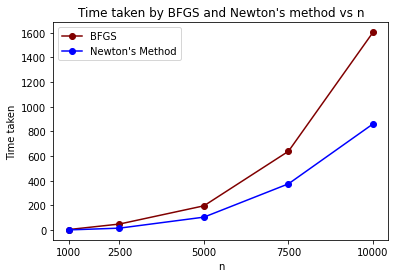

In [ ]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(n, time_taken_bfgs, '-o', label='BFGS', color='maroon')
plt.plot(n, time_taken_newton, '-o', label="Newton's Method", color='blue')
plt.xlabel('n')
plt.ylabel('Time taken')
plt.legend()
plt.xticks(n)
plt.title("Time taken by BFGS and Newton's method vs n")
plt.show()

Observations: 

*   Time taken by both the methods to find minimizer increases with increase in n but time taken in the BFGS method is more than time taken in Newton's method.
*   The minimum function value is close to zero and the minimizer is close to $[1,1,...,1] \in R^n$ for all values of n.

